In [1]:
import numpy as np
from glob import glob
import cv2, os, random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
path1='dogs-vs-cats/catdog_train/'
path2='dogs-vs-cats/catdog_test/'

In [4]:
ROW, COL = 96, 96

dogs, cats = [], []
y_dogs, y_cats = [], []

In [5]:
dog_path = os.path.join(path1, 'dog.*')
len(glob(dog_path))

10000

In [6]:
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [7]:
cat_path = os.path.join(path1, 'cat.*')
len(glob(cat_path))

10000

In [8]:
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [9]:
classes = ['dog', 'cat']

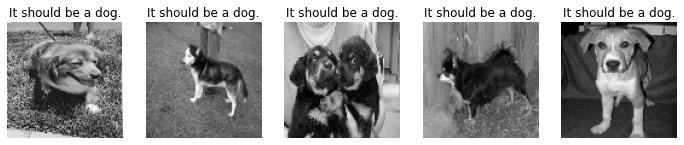

In [10]:
plt.figure(figsize=(12,8))    
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[0]))        
plt.show()

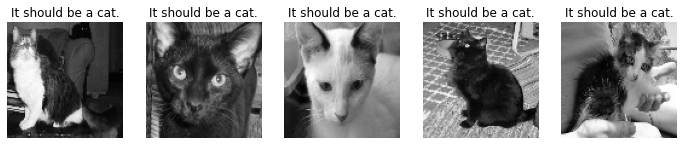

In [11]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[1]))
plt.show()

In [12]:
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [13]:
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [14]:
x_train = np.concatenate((dogs,cats), axis=0)
y_train = np.concatenate((y_dogs, y_cats), axis=0)

In [15]:
len(x_train)

20000

In [16]:
dogs, cats = [], []
y_dogs, y_cats = [], []

In [17]:
dog_path = os.path.join(path2, 'dog.*')
len(glob(dog_path))

2500

In [18]:
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [19]:
cat_path = os.path.join(path2, 'cat.*')
len(glob(cat_path))

2500

In [20]:
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [21]:
classes = ['dog', 'cat']

In [22]:
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [23]:
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [24]:
x_test = np.concatenate((dogs,cats), axis=0)
y_test = np.concatenate((y_dogs, y_cats), axis=0)

In [27]:
dogs.shape, cat.shape

((2500, 96, 96, 1), (96, 96, 1))

In [26]:
x_test.shape, y_test.shape

((5000, 96, 96, 1), (5000,))

In [ ]:
# y_train = tf.keras.utils.to_categorical(y_train, 2)

In [28]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, 1), 
           activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0

In [29]:
# model.compile(loss='categorical_crossentropy', 
#               optimizer=Adam(), metrics=['accuracy'])

In [30]:
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(), metrics=['accuracy'])

In [31]:
modelpath = "model/dogs_vs_cats-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2, 
#           callbacks=[checkpointer, early_stopping_callback])

In [34]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2, shuffle=True,
          callbacks=[checkpointer])

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
15968/16000 [============================>.] - ETA: 0s - loss: 5.7232 - accuracy: 0.6247
Epoch 00001: val_loss improved from inf to 15.24924, saving model to model/dogs_vs_cats-cnn-01-15.2492.hdf5
16000/16000 [==============================] - 234s 15ms/sample - loss: 5.7185 - accuracy: 0.6250 - val_loss: 15.2492 - val_accuracy: 0.0000e+00
Epoch 2/10
15968/16000 [============================>.] - ETA: 0s - loss: 5.7194 - accuracy: 0.6249
Epoch 00002: val_loss did not improve from 15.24924
16000/16000 [==============================] - 235s 15ms/sample - loss: 5.7185 - accuracy: 0.6250 - val_loss: 15.2492 - val_accuracy: 0.0000e+00
Epoch 3/10
15968/16000 [============================>.] - ETA: 0s - loss: 5.7213 - accuracy: 0.6248
Epoch 00003: val_loss did not improve from 15.24924
16000/16000 [==============================] - 236s 15ms/sample - loss: 5.7185 - accuracy: 0.6250 - val_loss: 15.2492 - val_accuracy: 0.0000e+00
Epoc

In [35]:
from tensorflow.keras.models import load_model

In [36]:
del model

In [37]:
model = load_model('model/dogs_vs_cats-cnn-01-15.2492.hdf5')

In [38]:
scores = model.evaluate(x_train, y_train, verbose=2)
print('MODEL ACCURACY: %.5f' % scores[1])

20000/20000 - 54s - loss: 7.6246 - accuracy: 0.5000
MODEL ACCURACY: 0.50000
